#  Weather Prep

This notebook explores how weather effects the pace of ultramarathons. Weather is a key factor into the performance of runners, especially for ultra
marathons. It seems that in extreme heat, the performance of athletes decreases. This would also
be relative to ultra marathons. The mean yearly average pace was compared to the mean yearly
average temperature and, using linear regression, found that as the degrees Celsius temperature
rises by 1 degree, there is a 0.1 rise in minutes per kilometre pace for the UTMB and Western
States. Each race was imagined to be ran at 22 degrees Celsius. Therefore, for 2016, where the
temperature was 30 degrees Celsius, (0.1 * 8) was subtracted from every average pace of every
runner for that year. This process was repeated for each year, multiplying 0.1 by the difference
between the temperatures.

##  UTMB Weather

We first examine UTMB

In [76]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [77]:
df = pd.read_csv('../../data/1km_splits_full.csv', encoding = "ISO-8859-1")

In [78]:
wea = pd.read_csv('../../data/UTMB_weather.csv')

In [79]:
wea

,Year,Chamonix,Courmayeur
0,2017,18,16
1,2016,33,27
2,2015,25,25
3,2014,21,23
4,2013,20,22
5,2011,23,23


In [80]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,5.281863,NaN,NaN,4.375000,NaN,5.443366,6.483539,9.900000,4.980392,8.205502,4.044218,9.433333,5.237037,5.646341,NaN,NaN,10.649660,6.691441,6.487179,11.881481,5.323333,5.707143,NaN,NaN,8.030973,NaN,NaN,6.102041,NaN,8.604167,NaN,7.747126,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,5.147059,NaN,NaN,4.519737,NaN,5.501618,6.510288,10.100000,4.970588,8.098706,4.047619,9.429167,5.255556,5.743902,NaN,NaN,11.159864,6.887387,6.810897,12.225926,5.376667,5.800000,NaN,NaN,8.781711,NaN,NaN,5.768707,NaN,8.729167,NaN,7.235632,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,5.544118,NaN,NaN,4.372807,NaN,5.500000,6.981481,10.769697,5.689542,8.812298,4.452381,10.020833,5.629630,6.292683,NaN,NaN,11.411565,6.979730,6.519231,NaN,11.085000,5.870238,NaN,NaN,8.631268,NaN,NaN,5.323129,NaN,9.222222,NaN,7.497126,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,5.283088,NaN,NaN,4.379386,NaN,5.441748,6.489712,11.700000,5.741830,9.105178,4.812925,10.220833,5.677778,6.516260,NaN,NaN,12.340136,7.243243,7.243590,13.255556,5.170000,5.839286,NaN,NaN,8.510324,NaN,NaN,6.119048,NaN,9.104167,NaN,7.370690,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,5.145833,NaN,NaN,4.245614,NaN,5.582524,6.615226,9.887879,4.973856,8.249191,3.901361,8.366667,5.162963,6.024390,NaN,NaN,10.870748,7.063063,6.448718,11.896296,5.868333,7.513095,NaN,NaN,12.036873,NaN,NaN,4.996599,NaN,8.180556,NaN,6.422414,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


In [81]:
wea['Average'] = (wea.Chamonix + wea.Courmayeur) / 2

In [82]:
wea

,Year,Chamonix,Courmayeur,Average
0,2017,18,16,17.0
1,2016,33,27,30.0
2,2015,25,25,25.0
3,2014,21,23,22.0
4,2013,20,22,21.0
5,2011,23,23,23.0


In [83]:
wea = wea.drop('Courmayeur', axis=1)

In [84]:
wea = wea.drop('Chamonix', axis=1)

In [85]:
wea

,Year,Average
0,2017,17.0
1,2016,30.0
2,2015,25.0
3,2014,22.0
4,2013,21.0
5,2011,23.0


In [86]:
mean = df.groupby(['Year']).mean()

mean = mean[['AVG_Pace']]
mean = mean.reset_index()

In [87]:
df1 = pd.merge(wea, mean, on='Year')

In [88]:
df1

,Year,Average,AVG_Pace
0,2017,17.0,14.427683
1,2016,30.0,15.341156
2,2015,25.0,15.333644
3,2014,22.0,14.213109
4,2013,21.0,14.145733
5,2011,23.0,13.922028


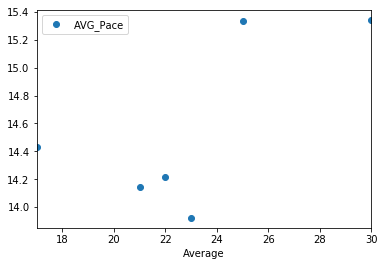

In [89]:
df1 = df1.sort_values(by = 'Average')
df1.plot(x='Average', y='AVG_Pace', style='o')

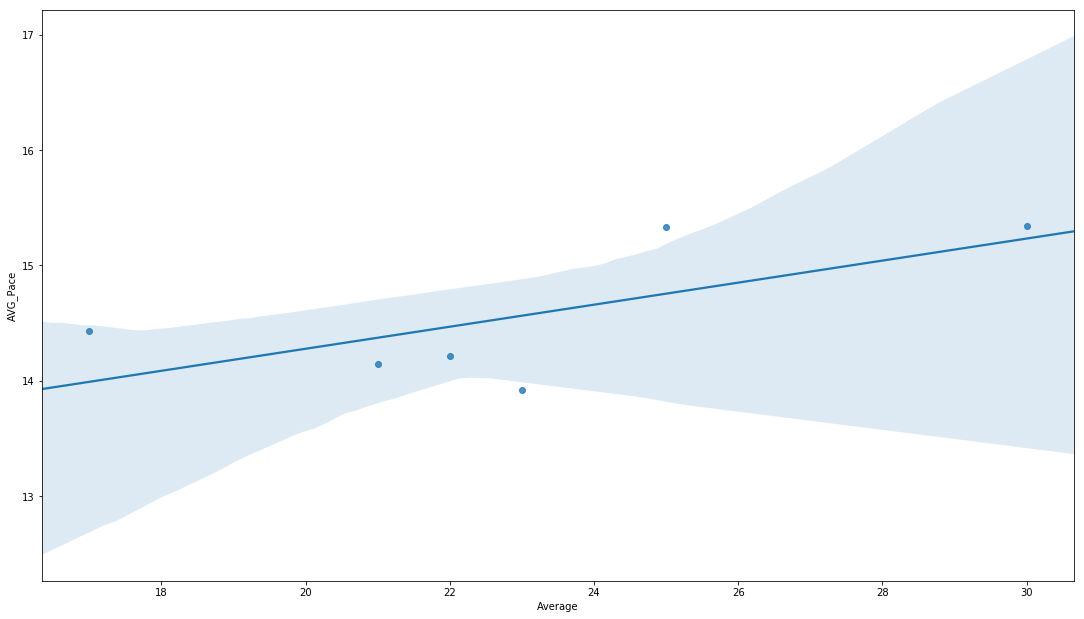

In [90]:
import seaborn as sns

fig, ax = plt.subplots()

fig.set_size_inches(18.5, 10.5)
sns.regplot('Average', 'AVG_Pace', data=df1)




###  Linear Regression

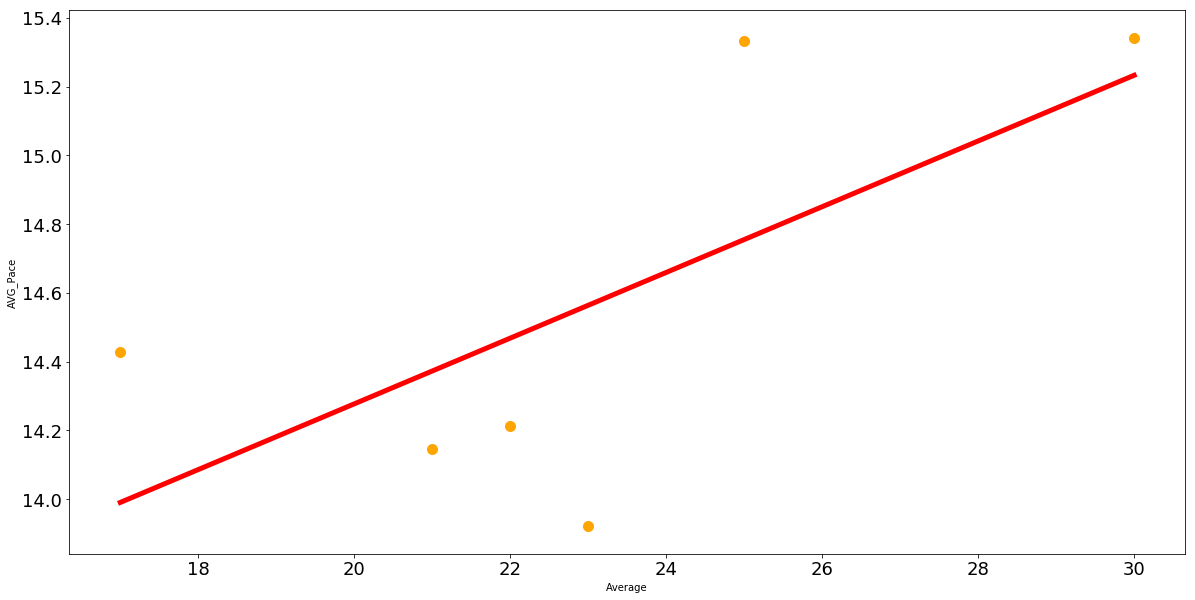

In [91]:
fig = plt.figure()
ax1 = df1.plot(kind='scatter', x='Average', y='AVG_Pace', color='orange', figsize=(20, 10), fontsize = 18, s=100)  
x = df1['Average']
y = df1['AVG_Pace']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)

# ax1.set_ylabel('Finish Time', fontsize = 24)
# ax1.set_xlabel('Relative Start Pace', fontsize = 24)
# fig.suptitle('Average 1km pace per Category', fontsize=20)
# ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

Linear regression is used to find the slope

###  Slope

In [92]:
p(17)

13.990400298675812

In [93]:
p(30)

15.232965867091179

In [94]:
(15.232965867091179 - 13.990400298675812) / (30 - 17)

0.09558196680118208

In [95]:
df1['Reg'] = [14,14.2, 14.3, 14.5, 14.7, 15.1]

In [96]:
df1['weight'] = df1.Reg / df1.AVG_Pace

In [97]:
df1

,Year,Average,AVG_Pace,Reg,weight
0,2017,17.0,14.427683,14.0,0.970357
4,2013,21.0,14.145733,14.2,1.003836
3,2014,22.0,14.213109,14.3,1.006113
5,2011,23.0,13.922028,14.5,1.041515
2,2015,25.0,15.333644,14.7,0.958676
1,2016,30.0,15.341156,15.1,0.984280


slope = 0.1

# Finding runners of 2015 and 2016

In [98]:
d16 = df[df.Year == 2016]
d15 = df[df.Year == 2015]

In [99]:
frames = [d15, d16]
dfY = pd.concat(frames)

In [100]:
# Count number of races per runner
v = dfY.name_mask.value_counts()
# Get runners who ran more than one race
multi_race_runners = v.index[v.gt(1)]
# Filter by multi_race_runners
dfY = dfY[dfY.name_mask.isin(multi_race_runners)]

In [101]:
dfY

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
5090,5090,NaN,2015,3.0,833d924b36952b34697b3aa4f293d126,ADIDAS TRAIL RUNNING,Male,Senior Men (23-39),NaN,ES,5.386029,NaN,NaN,4.504386,NaN,5.826861,7.113169,10.718182,5.640523,8.216828,10.772109,9.966667,5.544444,6.239837,4.462963,14.250000,NaN,6.966216,6.826923,13.011111,6.705000,6.991667,NaN,NaN,10.343658,NaN,NaN,5.884354,13.754717,NaN,5.319444,NaN,11.660173,NaN,NaN,8.111111,NaN,NaN,5.135135,1317.283333,48.033333,7.974060
5091,5091,NaN,2015,7.0,bf5f4fb86e38559cba1d9b622aa26fd4,NIKE TRAIL ELITE,Male,Senior Men (23-39),3.0,US,5.894608,NaN,NaN,5.118421,NaN,5.998382,6.769547,11.630303,6.777778,8.820388,14.207483,11.233333,6.625926,7.617886,4.314815,15.400000,NaN,7.540541,7.858974,12.029630,5.881667,7.025000,NaN,NaN,7.756637,NaN,NaN,5.935374,10.798742,NaN,5.530556,NaN,10.588745,NaN,NaN,7.348485,NaN,NaN,4.412162,1319.700000,50.450000,8.124615
5093,5093,4.0,2015,15.0,bb8ad98c516518eecb8038a1bf770afc,DMA TERRE DE RUNNING,Male,Senior Men (23-39),5.0,FR,5.618873,NaN,NaN,4.765351,NaN,6.000000,7.555556,11.393939,5.816993,8.553398,11.857143,11.120833,6.340741,6.833333,6.203704,14.404167,NaN,7.831081,7.567308,13.525926,5.690000,7.098810,NaN,NaN,9.210914,NaN,NaN,6.105442,12.836478,NaN,5.805556,NaN,11.727273,NaN,NaN,8.267677,NaN,NaN,5.558559,1348.433333,79.183333,8.307562
5095,5095,6.0,2015,48.0,17732612618a42f26f0bef246c760a85,A.E.MATXACUCA,Male,Senior Men (23-39),7.0,ES,5.618873,NaN,NaN,4.625000,NaN,6.100324,7.584362,11.360606,5.686275,8.621359,11.840136,11.141667,5.881481,6.825203,9.666667,14.308333,NaN,7.745495,7.551282,13.537037,5.691667,7.097619,NaN,NaN,9.365782,NaN,NaN,6.517007,12.654088,NaN,6.105556,NaN,13.166667,NaN,NaN,9.535354,NaN,NaN,6.243243,1373.383333,104.133333,8.578843
5096,5096,7.0,2015,34.0,10039ae5aca3c4d5d28b1eba910568d8,ROCKY MOUNTAIN RUNNERS,Male,Senior Men (23-39),8.0,GB,5.703431,NaN,NaN,4.666667,NaN,6.396440,7.798354,11.290909,5.954248,8.805825,13.363946,10.862500,6.651852,7.638211,4.129630,15.587500,NaN,8.344595,7.602564,12.114815,5.865000,7.603571,NaN,NaN,9.458702,NaN,NaN,5.914966,12.116352,NaN,5.772222,NaN,12.811688,NaN,NaN,8.818182,NaN,NaN,6.114865,1390.116667,120.866667,8.455481
5097,5097,8.0,2015,45.0,93a490693d00fa5854293ff7be213a34,ISOSTAR LES SASIES,Male,Senior Men (23-39),9.0,FR,5.610294,NaN,NaN,4.609649,NaN,6.059871,7.234568,11.306061,5.552288,8.828479,12.166667,11.358333,6.018519,7.105691,9.666667,14.833333,NaN,8.297297,7.961538,12.596296,5.750000,7.401190,NaN,NaN,9.840708,NaN,NaN,6.384354,13.698113,NaN,6.427778,NaN,14.538961,NaN,NaN,10.848485,NaN,NaN,8.081081,1424.883333,155.633333,8.887049
5099,5099,10.0,2015,161.0,786745508427828c77cb4ee251b705d4,NaN,Male,Senior Men (23-39),11.0,JP,6.000000,NaN,NaN,4.802632,NaN,6.427184,8.164609,12.481818,6.372549,8.933657,12.292517,11.516667,6.285185,7.674797,10.740741,16.525000,NaN,8.051802,7.445513,14.725926,6.008333,7.927381,NaN,NaN,10.631268,NaN,NaN,6.353741,14.537736,NaN,6.119444,NaN,13.493506,NaN,NaN,8.171717,NaN,NaN,5.977477,1461.183333,191.933333,9.106448
5102,5102,13.0,2015,94.0,d9d2782d50213004f3c

In [102]:
dfY.sort_values(by = 'name_mask')

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
4959,4959,2424.0,2016,1552.0,0148b715a2efb7898f74afd345fceb1f,,Male,Masters Men 1 (40-49),2425.0,,8.075980,NaN,NaN,6.247807,NaN,11.966019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.763269
5556,5556,467.0,2015,2137.0,0148b715a2efb7898f74afd345fceb1f,CUORSORES ÅLAND,Male,Masters Men 1 (40-49),468.0,FI,7.435049,NaN,NaN,6.096491,NaN,8.043689,11.469136,15.060606,8.833333,13.364078,18.653061,18.733333,8.800000,9.512195,33.074074,20.633333,NaN,11.286036,12.570513,23.137037,10.750000,12.928571,NaN,NaN,17.681416,NaN,NaN,13.676871,22.081761,NaN,14.277778,NaN,23.443723,NaN,NaN,19.348485,NaN,NaN,9.750000,2273.500000,1004.250000,14.825623
6747,6747,1658.0,2015,1541.0,018ee0fc3ec58c7371203c19b41ae3ce,,Male,Masters Men 3 (60-69),1659.0,,9.665441,NaN,NaN,9.153509,NaN,12.165049,14.197531,20.306061,11.787582,15.872168,23.367347,18.975000,11.533333,14.536585,3.888889,31.191667,NaN,14.959459,16.634615,26.392593,12.563333,16.366667,NaN,NaN,20.483776,NaN,NaN,28.993197,27.308176,NaN,13.991667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.015166
4470,4470,1935.0,2016,2119.0,018ee0fc3ec58c7371203c19b41ae3ce,,Male,Masters Men 3 (60-69),1936.0,,9.627451,NaN,NaN,8.828947,NaN,11.783172,13.942387,20.387879,10.565359,15.249191,22.057823,21.116667,10.914815,13.971545,30.518519,NaN,35.377551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.257023
6926,6926,1837.0,2015,1760.0,01d86cf2e2994bdb7178d3b277ab55fb,,Male,Masters Men 2 (50-59),1838.0,,8.699755,NaN,NaN,7.585526,NaN,10.635922,14.152263,20.096970,10.555556,17.765372,23.006803,18.504167,10.862963,14.422764,52.481481,27.216667,NaN,18.743243,13.589744,32.540741,13.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.472937
4366,4366,1831.0,2016,2539.0,01d86cf2e2994bdb7178d3b277ab55fb,,Male,Masters Men 2 (50-59),1832.0,,9.337010,NaN,NaN,8.274123,NaN,11.197411,15.244856,20.657576,12.627451,16.488673,NaN,46.612500,11.725926,12.707317,38.962963,NaN,23.370748,20.283784,15.673077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.797387
3937,3937,1402.0,2016,2502.0,02e896e2f857d562615509710d1b1e43,NaN,Male,Masters Men 1 (40-49),1403.0,JP,9.437500,NaN,NaN,8.964912,NaN,11.475728,15.907407,21.687879,12.535948,15.412621,23.431973,20.787500,10.937037,13.808943,27.277778,NaN,26.602041,13.668919,13.298077,26.011111,12.823333,17.026190,NaN,NaN,21.505900,NaN,NaN,17.397959,25.625786,NaN,11.611111,NaN,24.417749,NaN,NaN,17.207071,NaN,NaN,11.245495,2759.916667,1439.883333,17.204239
7037,7037,1948.0,2015,1392.0,02e896e2f857d562615509710d1b1e43,,Male,Senior Men (23-39),1949.0,,8.432598,NaN,NaN,7.677632,NaN,11.148867,17.613169,21.903030,15.709150,15.815534,25.612245,24.020833,13.381481,13.540650,9.611111,34.233333,NaN,16.047297,16.144231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.726078
7444,7444,2355.

In [103]:
c15 = dfY[dfY.Year == 2015]

In [104]:
len(c15)

260

In [105]:
c15.time.isnull().sum()

125

In [106]:
c16 = dfY[dfY.Year == 2016]

In [107]:
len(c16)

261

In [108]:
c16.time.isnull().sum()

135

In [109]:
merge = c15.merge(c16,how='left',on='name_mask',suffixes=('', '_16'))

In [110]:
merge.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace,Unnamed: 0_16,Unnamed: 0.1_16,Year_16,bib_16,team_16,gender_16,category_16,rank_16,nationality_16,Chamonix to Delevret_16,Chamonix to La Charme_16,Chamonix to St-Gervais_16,Delevret to St-Gervais_16,La Charme to St-Gervais_16,St-Gervais to Contamines_16,Contamines to La Balme_16,La Balme to Bonhomme_16,Bonhomme to Chapieux_16,Chapieux to Col Seigne_16,Col Seigne to Lac Combal_16,Lac Combal to Mt-Favre_16,Mt-Favre to Checruit_16,Checruit to Courmayeur_16,Courmayeur to Courmayeur2_16,Courmayeur2 to Bertone_16,Courmayeur to Bertone_16,Bertone to Bonatti_16,Bonatti to Arnouvaz_16,Arnouvaz to Col Ferret_16,Col Ferret to La Fouly_16,La Fouly to Champex La_16,Champex La to Bovine_16,Champex La to Mortigny_16,Champex La to Giete_16,Bovine to Trient_16,Mortigny to Trient_16,Giete to Trient_16,Trient to La Catogne_16,Trient to Les Tseppe_16,La Catogne to Vallorcine_16,Les Tseppe to Vallorcine_16,Vallorcine to Tete aux Vents_16,Vallorcine to Argentiere_16,Vallorcine to Col Montet_16,Tete aux Vents to Flegere_16,Argentiere to Chamonix_16,Col Montet to Flegere_16,Flegere to Chamonix_16,time_16,timediff_16,AVG_Pace_16
0,5090,NaN,2015,3.0,833d924b36952b34697b3aa4f293d126,ADIDAS TRAIL RUNNING,Male,Senior Men (23-39),NaN,ES,5.386029,NaN,NaN,4.504386,NaN,5.826861,7.113169,10.718182,5.640523,8.216828,10.772109,9.966667,5.544444,6.239837,4.462963,14.250000,NaN,6.966216,6.826923,13.011111,6.705000,6.991667,NaN,NaN,10.343658,NaN,NaN,5.884354,13.754717,NaN,5.319444,NaN,11.660173,NaN,NaN,8.111111,NaN,NaN,5.135135,1317.283333,48.033333,7.974060,4740,2205.0,2016,NaN,,Male,Senior Men (23-39),2206.0,,5.692402,NaN,NaN,4.493421,NaN,6.184466,7.316872,11.024242,5.526144,9.367314,18.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.468465
1,5091,NaN,2015,7.0,bf5f4fb86e38559cba1d9b622aa26fd4,NIKE TRAIL ELITE,Male,Senior Men (23-39),3.0,US,5.894608,NaN,NaN,5.118421,NaN,5.998382,6.769547,11.630303,6.777778,8.820388,14.207483,11.233333,6.625926,7.617886,4.314815,15.400000,NaN,7.540541,7.858974,12.029630,5.881667,7.025000,NaN,NaN,7.756637,NaN,NaN,5.935374,10.798742,NaN,5.530556,NaN,10.588745,NaN,NaN,7.348485,NaN,NaN,4.412162,1319.700000,50.450000,8.124615,2538,3.0,2016,7.0,NIKE TRAIL,Male,Senior Men (23-39),4.0,US,6.153186,NaN,NaN,4.870614,NaN,6.027508,7.053498,11.451515,6.578431,9.750809,12.761905,11.425000,6.840741,7.930894,3.907407,NaN,12.435374,7.369369,7.301282,12.970370,6.830,6.421429,NaN,NaN,8.522124,NaN,NaN,6.095238,12.383648,NaN,5.341667,NaN,11.523810,NaN,NaN,9.919192,NaN,NaN,4.592342,1361.233333,41.200000,8.258294
2,5093,4.0,2015,15.0,bb8ad98c516518eecb8038a1bf770afc,DMA TERRE DE RUNNING,Male,Senior Men (23-39),5.0,FR,5.618873,NaN,NaN,4.765351,NaN,6.000000,7.555556,11.393939,5.816993,8.553398,11.857143,11.120833,6.340741,6.833333,6.203704,14.404167,NaN,7.831081,7.567308,13.525926,5.690000,7.098810,NaN,NaN,9.210914,NaN,NaN,6.105442,12.836478,NaN,5.805556,NaN,11.727273,NaN,NaN,8.267677,NaN,NaN,5.558559,1348.433333,79.

In [111]:
fin = merge[merge.time.notnull() & merge.time_16.notnull()]

In [112]:
fin

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace,Unnamed: 0_16,Unnamed: 0.1_16,Year_16,bib_16,team_16,gender_16,category_16,rank_16,nationality_16,Chamonix to Delevret_16,Chamonix to La Charme_16,Chamonix to St-Gervais_16,Delevret to St-Gervais_16,La Charme to St-Gervais_16,St-Gervais to Contamines_16,Contamines to La Balme_16,La Balme to Bonhomme_16,Bonhomme to Chapieux_16,Chapieux to Col Seigne_16,Col Seigne to Lac Combal_16,Lac Combal to Mt-Favre_16,Mt-Favre to Checruit_16,Checruit to Courmayeur_16,Courmayeur to Courmayeur2_16,Courmayeur2 to Bertone_16,Courmayeur to Bertone_16,Bertone to Bonatti_16,Bonatti to Arnouvaz_16,Arnouvaz to Col Ferret_16,Col Ferret to La Fouly_16,La Fouly to Champex La_16,Champex La to Bovine_16,Champex La to Mortigny_16,Champex La to Giete_16,Bovine to Trient_16,Mortigny to Trient_16,Giete to Trient_16,Trient to La Catogne_16,Trient to Les Tseppe_16,La Catogne to Vallorcine_16,Les Tseppe to Vallorcine_16,Vallorcine to Tete aux Vents_16,Vallorcine to Argentiere_16,Vallorcine to Col Montet_16,Tete aux Vents to Flegere_16,Argentiere to Chamonix_16,Col Montet to Flegere_16,Flegere to Chamonix_16,time_16,timediff_16,AVG_Pace_16
1,5091,NaN,2015,7.0,bf5f4fb86e38559cba1d9b622aa26fd4,NIKE TRAIL ELITE,Male,Senior Men (23-39),3.0,US,5.894608,NaN,NaN,5.118421,NaN,5.998382,6.769547,11.630303,6.777778,8.820388,14.207483,11.233333,6.625926,7.617886,4.314815,15.400000,NaN,7.540541,7.858974,12.029630,5.881667,7.025000,NaN,NaN,7.756637,NaN,NaN,5.935374,10.798742,NaN,5.530556,NaN,10.588745,NaN,NaN,7.348485,NaN,NaN,4.412162,1319.700000,50.450000,8.124615,2538,3.0,2016,7.0,NIKE TRAIL,Male,Senior Men (23-39),4.0,US,6.153186,NaN,NaN,4.870614,NaN,6.027508,7.053498,11.451515,6.578431,9.750809,12.761905,11.425000,6.840741,7.930894,3.907407,NaN,12.435374,7.369369,7.301282,12.970370,6.830000,6.421429,NaN,NaN,8.522124,NaN,NaN,6.095238,12.383648,NaN,5.341667,NaN,11.523810,NaN,NaN,9.919192,NaN,NaN,4.592342,1361.233333,41.200000,8.258294
4,5096,7.0,2015,34.0,10039ae5aca3c4d5d28b1eba910568d8,ROCKY MOUNTAIN RUNNERS,Male,Senior Men (23-39),8.0,GB,5.703431,NaN,NaN,4.666667,NaN,6.396440,7.798354,11.290909,5.954248,8.805825,13.363946,10.862500,6.651852,7.638211,4.129630,15.587500,NaN,8.344595,7.602564,12.114815,5.865000,7.603571,NaN,NaN,9.458702,NaN,NaN,5.914966,12.116352,NaN,5.772222,NaN,12.811688,NaN,NaN,8.818182,NaN,NaN,6.114865,1390.116667,120.866667,8.455481,2556,21.0,2016,27.0,ROCKY MOUNTAIN RUNNERS,Male,Senior Men (23-39),22.0,GB,5.927696,NaN,NaN,4.736842,NaN,6.428803,8.098765,12.196970,6.996732,11.144013,15.897959,14.770833,8.492593,10.292683,18.037037,NaN,13.632653,9.594595,8.801282,14.774074,8.995000,7.277381,NaN,NaN,9.399705,NaN,NaN,6.472789,11.550314,NaN,6.363889,NaN,11.865801,NaN,NaN,9.050505,NaN,NaN,5.065315,1537.550000,217.516667,9.834569
6,5099,10.0,2015,161.0,786745508427828c77cb4ee251b705d4,NaN,Male,Senior Men (23-39),11.0,JP,6.000000,NaN,NaN,4.802632,NaN,6.427184,8.164609,12.481818,6.372549,8.933657,12.292517,11.516667,6.285185,7.674797,10.740741,16.525000,NaN,8.051802,7.445513,14.725926,6.008333,7.9273

In [113]:
dnf = merge[merge.time.isnull() & merge.time_16.isnull()]

In [114]:
dnf

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace,Unnamed: 0_16,Unnamed: 0.1_16,Year_16,bib_16,team_16,gender_16,category_16,rank_16,nationality_16,Chamonix to Delevret_16,Chamonix to La Charme_16,Chamonix to St-Gervais_16,Delevret to St-Gervais_16,La Charme to St-Gervais_16,St-Gervais to Contamines_16,Contamines to La Balme_16,La Balme to Bonhomme_16,Bonhomme to Chapieux_16,Chapieux to Col Seigne_16,Col Seigne to Lac Combal_16,Lac Combal to Mt-Favre_16,Mt-Favre to Checruit_16,Checruit to Courmayeur_16,Courmayeur to Courmayeur2_16,Courmayeur2 to Bertone_16,Courmayeur to Bertone_16,Bertone to Bonatti_16,Bonatti to Arnouvaz_16,Arnouvaz to Col Ferret_16,Col Ferret to La Fouly_16,La Fouly to Champex La_16,Champex La to Bovine_16,Champex La to Mortigny_16,Champex La to Giete_16,Bovine to Trient_16,Mortigny to Trient_16,Giete to Trient_16,Trient to La Catogne_16,Trient to Les Tseppe_16,La Catogne to Vallorcine_16,Les Tseppe to Vallorcine_16,Vallorcine to Tete aux Vents_16,Vallorcine to Argentiere_16,Vallorcine to Col Montet_16,Tete aux Vents to Flegere_16,Argentiere to Chamonix_16,Col Montet to Flegere_16,Flegere to Chamonix_16,time_16,timediff_16,AVG_Pace_16
135,6723,1634.0,2015,1439.0,dfa1f42696bd41fca7c26211074ad9d8,,Male,Masters Men 2 (50-59),1635.0,,9.437500,NaN,NaN,7.684211,NaN,11.080906,13.327160,18.524242,9.359477,15.771845,19.408163,21.850000,11.722222,11.012195,78.592593,NaN,NaN,29.945946,15.474359,25.522222,9.541667,14.311905,NaN,NaN,27.974926,NaN,NaN,20.241497,30.644654,NaN,14.358333,NaN,28.677489,NaN,NaN,19.237374,NaN,NaN,NaN,NaN,NaN,20.160908,4246,1711.0,2016,1504.0,,Male,Masters Men 2 (50-59),1712.0,,9.025735,NaN,NaN,7.171053,NaN,15.176375,15.713992,18.296970,9.467320,14.618123,21.112245,17.750000,9.418519,13.097561,71.222222,NaN,24.013605,16.002252,16.416667,25.974074,11.593333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.592356
137,6729,1640.0,2015,1075.0,f98f15ad389246da134c25010707a127,,Male,Masters Men 2 (50-59),1641.0,,9.655637,NaN,NaN,9.217105,NaN,12.592233,15.452675,20.724242,13.071895,16.404531,22.353741,22.362500,13.055556,14.971545,11.537037,27.133333,NaN,16.146396,15.282051,24.274074,13.570000,17.810714,NaN,NaN,21.746313,NaN,NaN,15.132653,25.477987,NaN,13.233333,NaN,26.699134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.300204,4134,1599.0,2016,1411.0,,Male,Masters Men 3 (60-69),1600.0,,9.599265,NaN,NaN,9.217105,NaN,11.909385,15.016461,21.024242,12.758170,16.241100,23.812925,22.333333,12.585185,15.455285,30.611111,NaN,22.370748,15.204955,13.810897,25.485185,14.115000,16.771429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.128988
138,6733,1644.0,2015,440.0,e3bb4a243f518afba7f3efe63b0ea997,,Male,Masters Men 2 (50-59),1645.0,,9.322304,NaN,NaN,7.539474,NaN,10.674757,16.436214,20.278788,12.496732,16.111650,21.085034,18.225000,9.792593,11.589431,60.296296,26.612500,NaN,14.878378,14.227564,24.218519,12.221667,17.448810,NaN,NaN,25.675516,NaN,NaN,16.442177,25.242138,NaN,14.844444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.439090,4923,2388.0,201

In [115]:
fin1 = merge[merge.time.isnull() & merge.time_16.notnull()]

In [116]:
fin1

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace,Unnamed: 0_16,Unnamed: 0.1_16,Year_16,bib_16,team_16,gender_16,category_16,rank_16,nationality_16,Chamonix to Delevret_16,Chamonix to La Charme_16,Chamonix to St-Gervais_16,Delevret to St-Gervais_16,La Charme to St-Gervais_16,St-Gervais to Contamines_16,Contamines to La Balme_16,La Balme to Bonhomme_16,Bonhomme to Chapieux_16,Chapieux to Col Seigne_16,Col Seigne to Lac Combal_16,Lac Combal to Mt-Favre_16,Mt-Favre to Checruit_16,Checruit to Courmayeur_16,Courmayeur to Courmayeur2_16,Courmayeur2 to Bertone_16,Courmayeur to Bertone_16,Bertone to Bonatti_16,Bonatti to Arnouvaz_16,Arnouvaz to Col Ferret_16,Col Ferret to La Fouly_16,La Fouly to Champex La_16,Champex La to Bovine_16,Champex La to Mortigny_16,Champex La to Giete_16,Bovine to Trient_16,Mortigny to Trient_16,Giete to Trient_16,Trient to La Catogne_16,Trient to Les Tseppe_16,La Catogne to Vallorcine_16,Les Tseppe to Vallorcine_16,Vallorcine to Tete aux Vents_16,Vallorcine to Argentiere_16,Vallorcine to Col Montet_16,Tete aux Vents to Flegere_16,Argentiere to Chamonix_16,Col Montet to Flegere_16,Flegere to Chamonix_16,time_16,timediff_16,AVG_Pace_16
136,6725,1636.0,2015,1538.0,94e14f22dfd4ee74a2b5da3843df9036,,Female,Masters Women 1 (40-49),1637.0,,9.067402,NaN,NaN,8.184211,NaN,10.495146,11.794239,17.818182,10.153595,16.110032,22.200680,18.904167,9.862963,13.264228,74.037037,22.929167,NaN,11.918919,14.282051,22.400000,11.438333,18.595238,NaN,NaN,28.004425,NaN,NaN,15.445578,35.081761,NaN,14.372222,NaN,32.168831,NaN,NaN,13.308081,NaN,NaN,NaN,NaN,NaN,19.243187,3814,1279.0,2016,1328.0,NaN,Female,Masters Women 1 (40-49),1280.0,HK,8.654412,NaN,NaN,7.618421,NaN,10.359223,12.269547,18.733333,11.986928,17.275081,22.676871,18.345833,9.233333,12.447154,33.425926,NaN,20.809524,13.299550,13.278846,26.955556,11.756667,16.461905,NaN,NaN,24.685841,NaN,NaN,23.183673,29.047170,NaN,12.066667,NaN,24.476190,NaN,NaN,17.989899,NaN,NaN,11.594595,2722.250000,1402.216667,17.145286
139,6738,1649.0,2015,19.0,f9afc937b3b009afc6def5029e0cf169,,Male,Senior Men (23-39),1650.0,,5.828431,NaN,NaN,4.736842,NaN,6.150485,7.919753,11.924242,5.888889,8.377023,12.081633,10.820833,6.081481,6.939024,2.611111,15.416667,NaN,8.090090,7.153846,13.381481,6.111667,7.257143,NaN,NaN,9.970501,NaN,NaN,7.707483,16.194969,NaN,10.263889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.677613,2536,NaN,2016,9.0,TEAM VIBRAM,Male,Senior Men (23-39),NaN,LT,5.857843,NaN,NaN,4.675439,NaN,6.055016,7.434156,11.930303,5.866013,9.061489,11.037415,11.545833,6.140741,7.073171,3.796296,NaN,13.224490,7.770270,7.160256,13.203704,5.391667,6.527381,NaN,NaN,8.710914,NaN,NaN,5.857143,12.707547,NaN,5.686111,NaN,12.398268,NaN,NaN,8.742424,NaN,NaN,5.668919,1346.083333,26.050000,8.140912
140,6739,1650.0,2015,16.0,63dcffa59017238290ec31ef8e87522e,,Female,Senior Women (23-39),1651.0,,6.587010,NaN,NaN,5.076754,NaN,6.873786,7.888889,12.296970,5.728758,9.810680,12.540816,11.279167,6.062963,7.325203,NaN,16.529167,NaN,8.862613,8.112179,15.681481,6.591667,8.533333,NaN,NaN,11.615044,NaN,NaN,9.003401,17.12

In [117]:
print('runners who dnf 15 and finished 16: ', len(fin1))

runners who dnf 15 and finished 16:  55


In [118]:
fin2 = merge[merge.time.notnull() & merge.time_16.isnull()]

In [119]:
print('runners who finished 15 and dnf 16: ', len(fin2))

runners who finished 15 and dnf 16:  64


In [120]:
len(merge)

260

In [121]:
p16 = len(fin2) / len(merge)
print('% who finished 15 and not 16: ', p16*100)

% who finished 15 and not 16:  24.615384615384617


In [122]:
p15 = len(fin1) / len(merge)
print('% who dnf 15 and finished 16: ', p15*100)

% who dnf 15 and finished 16:  21.153846153846153


In [123]:
pnone = len(dnf) / len(merge)
print('% who dnf either: ', pnone*100)

% who dnf either:  26.923076923076923


In [124]:
both = len(fin) / len(merge)
print('% who finished both: ', both*100)

% who finished both:  27.307692307692307


In [125]:
fin.AVG_Pace.mean()

14.485869160204313

In [126]:
fin.AVG_Pace_16.mean()

14.397958261726226

In [127]:
slower = fin[fin.AVG_Pace_16 > fin.AVG_Pace]

In [128]:
len(slower)

36

In [129]:
faster = fin[fin.AVG_Pace_16 < fin.AVG_Pace]

In [130]:
len(faster)

35

# Western States

Comparing to weather for Western States

In [131]:
wdf = pd.read_csv('../../data/WS_1km_splits_full.csv', encoding = "ISO-8859-1")

In [132]:
WSwea = pd.read_csv('../../data/WS_weather.csv')

In [133]:
WSwea

,Year,Squak_Valley,Michigan_Bluff,SV_Wind,MB_Wind
0,2018,99,86,NaN,NaN
1,2017,86,83,13.0,10.0
2,2016,83,82,14.0,13.0
3,2015,87,78,15.0,9.0
4,2014,82,76,18.0,12.0
5,2013,93,88,17.0,13.0


In [134]:
WSwea['Average'] = (WSwea.Squak_Valley + WSwea.Michigan_Bluff) / 2

In [135]:
WSwea

,Year,Squak_Valley,Michigan_Bluff,SV_Wind,MB_Wind,Average
0,2018,99,86,NaN,NaN,92.5
1,2017,86,83,13.0,10.0,84.5
2,2016,83,82,14.0,13.0,82.5
3,2015,87,78,15.0,9.0,82.5
4,2014,82,76,18.0,12.0,79.0
5,2013,93,88,17.0,13.0,90.5


In [136]:
WSwea = WSwea.drop('Michigan_Bluff', axis=1)

In [137]:
WSwea = WSwea.drop('Squak_Valley', axis=1)

In [138]:
WSwea

,Year,SV_Wind,MB_Wind,Average
0,2018,NaN,NaN,92.5
1,2017,13.0,10.0,84.5
2,2016,14.0,13.0,82.5
3,2015,15.0,9.0,82.5
4,2014,18.0,12.0,79.0
5,2013,17.0,13.0,90.5


Formula for Farenhite to Celcius is (X°F − 32) × 5/9 = Y°C

In [139]:
WSwea.Average = (WSwea.Average - 32) * (5/9)

In [140]:
WSwea

,Year,SV_Wind,MB_Wind,Average
0,2018,NaN,NaN,33.611111
1,2017,13.0,10.0,29.166667
2,2016,14.0,13.0,28.055556
3,2015,15.0,9.0,28.055556
4,2014,18.0,12.0,26.111111
5,2013,17.0,13.0,32.500000


In [141]:
wmean = wdf.groupby(['Year']).mean()

wmean = wmean[['AVG_Pace']]
wmean = wmean.reset_index()

In [142]:
wmean

,Year,AVG_Pace
0,2010,11.476403
1,2012,9.962493
2,2013,11.441634
3,2014,10.525116
4,2015,11.136452
5,2016,12.390833
6,2017,11.023252
7,2018,13.539179


In [143]:
wdf1 = pd.merge(WSwea, wmean, on='Year')

In [145]:
wdf1 = wdf1[wdf1.Year != 2018 ]

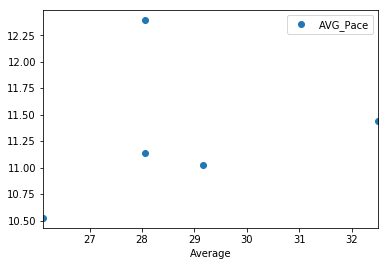

In [146]:
wdf1 = wdf1.sort_values(by = 'Average')
wdf1.plot(x='Average', y='AVG_Pace', style='o')

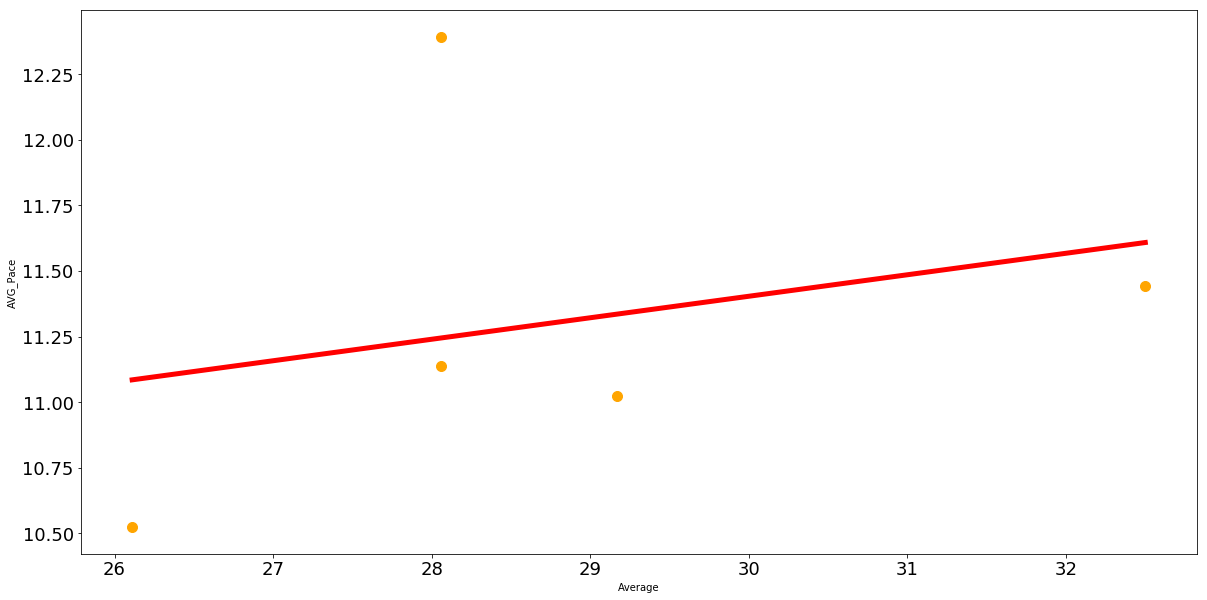

In [147]:
fig = plt.figure()
ax1 = wdf1.plot(kind='scatter', x='Average', y='AVG_Pace', color='orange', figsize=(20, 10), fontsize = 18, s=100)  
x = wdf1['Average']
y = wdf1['AVG_Pace']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)

# ax1.set_ylabel('Finish Time', fontsize = 24)
# ax1.set_xlabel('Relative Start Pace', fontsize = 24)
# fig.suptitle('Average 1km pace per Category', fontsize=20)
# ax1.legend(['Male Trend', 'Female Trend', 'Male', 'Female'], frameon = True, ncol=2, loc='upper right', fontsize = 22)

###  Slope

In [148]:
p(26)

11.075797901110199

In [149]:
p(32)

11.567542819579272

In [150]:
(11.567542819579272 - 11.075797901110199) / (32 - 26)

0.08195748641151201

In [151]:
df

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,5.281863,NaN,NaN,4.375000,NaN,5.443366,6.483539,9.900000,4.980392,8.205502,4.044218,9.433333,5.237037,5.646341,NaN,NaN,10.649660,6.691441,6.487179,11.881481,5.323333,5.707143,NaN,NaN,8.030973,NaN,NaN,6.102041,NaN,8.604167,NaN,7.747126,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,5.147059,NaN,NaN,4.519737,NaN,5.501618,6.510288,10.100000,4.970588,8.098706,4.047619,9.429167,5.255556,5.743902,NaN,NaN,11.159864,6.887387,6.810897,12.225926,5.376667,5.800000,NaN,NaN,8.781711,NaN,NaN,5.768707,NaN,8.729167,NaN,7.235632,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,5.544118,NaN,NaN,4.372807,NaN,5.500000,6.981481,10.769697,5.689542,8.812298,4.452381,10.020833,5.629630,6.292683,NaN,NaN,11.411565,6.979730,6.519231,NaN,11.085000,5.870238,NaN,NaN,8.631268,NaN,NaN,5.323129,NaN,9.222222,NaN,7.497126,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,5.283088,NaN,NaN,4.379386,NaN,5.441748,6.489712,11.700000,5.741830,9.105178,4.812925,10.220833,5.677778,6.516260,NaN,NaN,12.340136,7.243243,7.243590,13.255556,5.170000,5.839286,NaN,NaN,8.510324,NaN,NaN,6.119048,NaN,9.104167,NaN,7.370690,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,5.145833,NaN,NaN,4.245614,NaN,5.582524,6.615226,9.887879,4.973856,8.249191,3.901361,8.366667,5.162963,6.024390,NaN,NaN,10.870748,7.063063,6.448718,11.896296,5.868333,7.513095,NaN,NaN,12.036873,NaN,NaN,4.996599,NaN,8.180556,NaN,6.422414,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069
5,5,5.0,2017,17.0,f94453abd655927dc15006974bce67ad,The North Face / Buff,Male,Senior Men (23-39),6.0,ES,5.387255,NaN,NaN,4.407895,NaN,5.551780,6.576132,10.672727,5.679739,8.713592,4.350340,10.383333,5.222222,5.890244,NaN,NaN,12.051020,7.484234,7.362179,14.233333,5.800000,5.917857,NaN,NaN,8.498525,NaN,NaN,6.068027,NaN,9.190972,NaN,7.715517,NaN,NaN,8.288288,NaN,NaN,10.135714,4.556306,1212.716667,70.816667,7.505718
6,6,6.0,2017,9.0,5a376cf8730a72a85ed45ec976ce3ccf,The North Face,Male,Senior Men (23-39),7.0,US,5.463235,NaN,NaN,4.565789,NaN,5.569579,6.847737,10.763636,5.761438,8.744337,4.530612,10.000000,5.637037,6.296748,NaN,NaN,11.193878,6.894144,6.724359,NaN,11.740000,6.146429,NaN,NaN,8.570796,NaN,NaN,5.942177,NaN,9.875000,NaN,7.617816,NaN,NaN,8.612613,NaN,NaN,10.540476,5.195946,1219.800000,77.900000,7.531904
7,7,7.0,2017,13.0,f9afc937b3b009afc6def5029e0cf169,VIBRAM,Male,Senior Men (23-39),8.0,LT,5.458333,NaN,NaN,4.489035,NaN,5.482201,6.343621,11.209091,5.849673,8.781553,4.680272,10.720833,5.951852,6.914634,NaN,NaN,NaN,16.54504